In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# from statsmodels.sandbox.tsa.fftarma import ArmaFft
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error

In [51]:
df = pd.read_csv('1.csv',index_col=0)
print(df.dtypes)
df.head()


\tCPU cores                                  int64
\tCPU capacity provisioned [MHZ]           float64
\tCPU usage [MHZ]                          float64
\tCPU usage [%]                            float64
\tMemory capacity provisioned [KB]         float64
\tMemory usage [KB]                        float64
\tDisk read throughput [KB/s]              float64
\tDisk write throughput [KB/s]             float64
\tNetwork received throughput [KB/s]       float64
\tNetwork transmitted throughput [KB/s]    float64
dtype: object


,\tCPU cores,\tCPU capacity provisioned [MHZ],\tCPU usage [MHZ],\tCPU usage [%],\tMemory capacity provisioned [KB],\tMemory usage [KB],\tDisk read throughput [KB/s],\tDisk write throughput [KB/s],\tNetwork received throughput [KB/s],\tNetwork transmitted throughput [KB/s]
Timestamp [ms],,,,,,,,,,
1372629804,2,5851.9989,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667
1372630104,2,5851.9989,29.259995,0.500000,8218624.0,4.585755e+05,0.000000,2.333333,0.200000,1.000000
1372630404,2,5851.9989,27.309328,0.466667,8218624.0,1.845480e+05,32.066667,4.200000,0.133333,1.066667
1372630704,2,5851.9989,23.407996,0.400000,8218624.0,7.829227e+04,0.000000,0.866667,0.066667,1.000000
1372631004,2,5851.9989,19.506663,0.333333,8218624.0,1.677720e+05,0.000000,0.200000,0.133333,1.000000


In [52]:
# df=pd.read_csv('1.csv', index_col=0)

In [53]:
df.index = pd.to_datetime(df.index,unit='s')


# df['CPU cores']=df['\tCPU cores'].replace("\t"," ", regex=True)
# df['col'].replace("\t"," ", regex=True)
# df['col'].replace("\t"," ", regex=True)
df.head(4)

,\tCPU cores,\tCPU capacity provisioned [MHZ],\tCPU usage [MHZ],\tCPU usage [%],\tMemory capacity provisioned [KB],\tMemory usage [KB],\tDisk read throughput [KB/s],\tDisk write throughput [KB/s],\tNetwork received throughput [KB/s],\tNetwork transmitted throughput [KB/s]
Timestamp [ms],,,,,,,,,,
2013-06-30 22:03:24,2,5851.9989,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667
2013-06-30 22:08:24,2,5851.9989,29.259995,0.500000,8218624.0,4.585755e+05,0.000000,2.333333,0.200000,1.000000
2013-06-30 22:13:24,2,5851.9989,27.309328,0.466667,8218624.0,1.845480e+05,32.066667,4.200000,0.133333,1.066667
2013-06-30 22:18:24,2,5851.9989,23.407996,0.400000,8218624.0,7.829227e+04,0.000000,0.866667,0.066667,1.000000


In [54]:
df.dtypes

\tCPU cores                                  int64
\tCPU capacity provisioned [MHZ]           float64
\tCPU usage [MHZ]                          float64
\tCPU usage [%]                            float64
\tMemory capacity provisioned [KB]         float64
\tMemory usage [KB]                        float64
\tDisk read throughput [KB/s]              float64
\tDisk write throughput [KB/s]             float64
\tNetwork received throughput [KB/s]       float64
\tNetwork transmitted throughput [KB/s]    float64
dtype: object

In [55]:
type(df.index)
print(df.shape)

(8260, 10)


In [56]:
df.columns

Index(['\tCPU cores', '\tCPU capacity provisioned [MHZ]', '\tCPU usage [MHZ]',
       '\tCPU usage [%]', '\tMemory capacity provisioned [KB]',
       '\tMemory usage [KB]', '\tDisk read throughput [KB/s]',
       '\tDisk write throughput [KB/s]',
       '\tNetwork received throughput [KB/s]',
       '\tNetwork transmitted throughput [KB/s]'],
      dtype='object')

In [57]:
df=df['\tCPU usage [MHZ]']
df.head()


Timestamp [ms]
2013-06-30 22:03:24    87.779984
2013-06-30 22:08:24    29.259995
2013-06-30 22:13:24    27.309328
2013-06-30 22:18:24    23.407996
2013-06-30 22:23:24    19.506663
Name: \tCPU usage [MHZ], dtype: float64

<h1>ADF Test </h1>

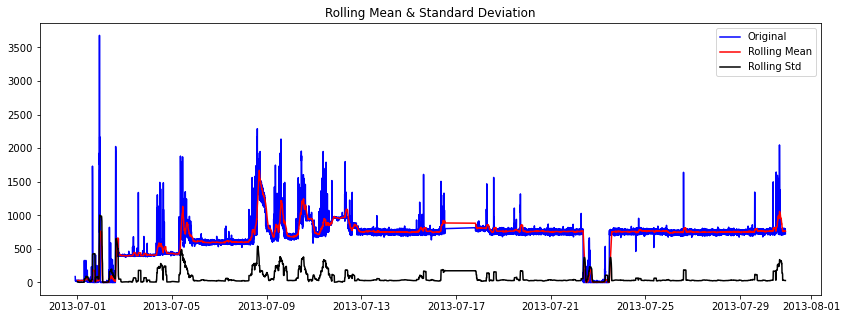

<Results of Dickey-Fuller Test>
Test Statistic                   -4.582703
p-value                           0.000139
#Lags Used                       37.000000
Number of Observations Used    8222.000000
Critical Value (1%)              -3.431146
Critical Value (5%)              -2.861892
Critical Value (10%)             -2.566957
dtype: float64


In [58]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df)

In [59]:
output = (adf(df))
output

(-4.58270340813987,
 0.00013899120369363155,
 37,
 8222,
 {'1%': -3.4311455902177985,
  '5%': -2.8618915951778354,
  '10%': -2.566957149312134},
 100443.11946468473)

<h3>Train Test Split </h3>


(7000,)
(1260,)


<AxesSubplot:xlabel='Timestamp [ms]'>

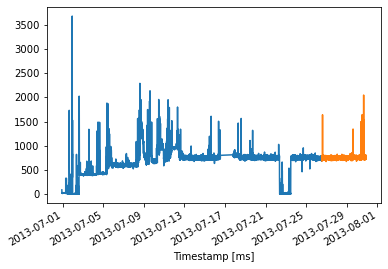

In [60]:
train_set= df.iloc[:7000]
test_set= df.iloc[7000:]

print(train_set.shape)
print(test_set.shape)

ax = train_set.plot()
test_set.plot(ax=ax)

<h2> Savitzsky Golay Filtering </h2>

In [61]:
train_set.head()
print(train_set.values[:20])
type(train_set)


[87.7799835 29.2599945 27.3093282 23.4079956 19.506663  29.2599945
 29.2599945 29.2599945 29.2599945 19.506663  27.3093282 29.2599945
 29.2599945 25.3586619 27.3093282 29.2599945 29.2599945 25.3586619
 11.7039978 29.2599945]


pandas.core.series.Series

In [62]:
from scipy.signal import savgol_filter

smoothed_2dg = savgol_filter(train_set, window_length = 5, polyorder = 2)
print(smoothed_2dg[:20])

diff=mean_absolute_error(smoothed_2dg,train_set.values)
print(diff)

sr = pd.Series(smoothed_2dg) 
  
# Create the Index 
index_ = train_set.index
  
# set the index 
sr.index = index_

train_set=sr



train_set.head()

[81.25918473 44.02932506 22.12612917 22.40479579 22.6834624  26.41759503
 30.09599434 30.09599434 26.0831951  23.85386218 24.96852864 29.76159441
 28.25679469 26.69626165 26.97492826 29.2599945  29.59439444 21.34586265
 19.39519635 23.90959551]
24.896816898796267


Timestamp [ms]
2013-06-30 22:03:24    81.259185
2013-06-30 22:08:24    44.029325
2013-06-30 22:13:24    22.126129
2013-06-30 22:18:24    22.404796
2013-06-30 22:23:24    22.683462
dtype: float64

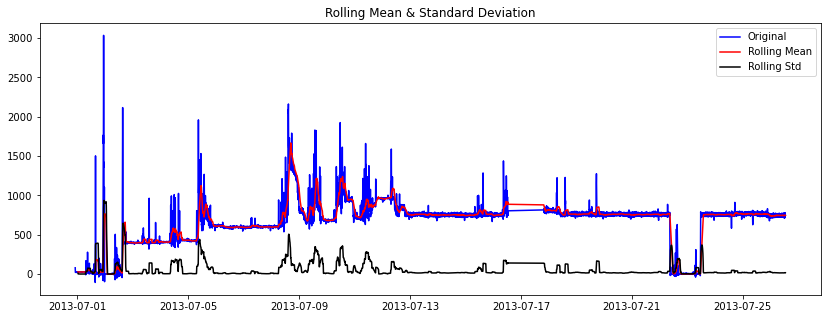

<Results of Dickey-Fuller Test>
Test Statistic                   -4.155132
p-value                           0.000784
#Lags Used                       35.000000
Number of Observations Used    6964.000000
Critical Value (1%)              -3.431289
Critical Value (5%)              -2.861955
Critical Value (10%)             -2.566991
dtype: float64


In [63]:
output = (adf(train_set))
output
test_stationarity(train_set)

<h2>Applying ARIMA model on the  train set</h2> 


In [64]:
#building the model
# from pmdarima.arima import auto_arima
# model = auto_arima(train_set, trace=True, error_action='ignore', suppress_warnings=False)
# model.fit(train_set)

# forecast = model.predict(n_periods=len(test_set))
# forecast = pd.DataFrame(forecast,index = test_set.index,columns=['Prediction'])

# #plot the predictions for validation set
# plt.plot(train_set, label='Train')
# plt.plot(test_set, label='Valid')
# plt.plot(forecast, label='Prediction')
# plt.legend(loc='best')
# plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae=mean_absolute_error(forecast.values,test_set)

print('mae = ',mae)

rmse = np.sqrt(mean_squared_error(forecast.values,test_set))

print('rmse = ',rmse)



NameError: name 'forecast' is not defined

In [26]:
# #using sarimax to account for seasonality and then forecasting
# #building the model
# from pmdarima.arima import auto_arima
# model = fftarma(train_set)
# model.fit(train_set)

# forecast = model.predict(n_periods=len(test_set))
# forecast = pd.DataFrame(forecast,index = test_set.index,columns=['Prediction'])

# #plot the predictions for validation set
# plt.plot(train_set, label='Train')
# plt.plot(test_set, label='Valid')
# plt.plot(forecast, label='Prediction')
# plt.legend(loc='best')
# plt.show()
